In [2]:
from keras.models import Model
from keras.layers import Dense #This is the layer which shows the layer is connected to all previous neuron
from keras.layers import Input
#from sklearn.datasets import make_circles
#from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
data=pd.read_csv("mnist_train_small.csv").values

In [4]:
X=data[:,2:]

In [5]:
y=data[:,1]

In [6]:
ohe=OneHotEncoder(categories="auto")

# ----------------------------------------------------

# ------------------------------------------------


In [194]:
y_hot=ohe.fit_transform(y.reshape(-1,1)).todense()
y_sec=ohe.fit_transform((y>5).reshape(-1,1)).todense()

In [195]:
y_hot.shape

(8000, 10)

In [196]:
y_sec.shape

(8000, 2)

In [62]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

In [9]:
model=Model()

W0706 17:05:25.617402 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
X.shape

(8000, 784)

In [11]:
in_layer=Input(shape=[784])# This is showing inputs of first layer
layer_1=Dense(200,activation="relu")(in_layer)
layer_2=Dense(50,activation="relu")(layer_1)  #This shows it is connected to layer 1 and this is called functinal api that means layer 1 is function of layer 1 in this
layer_3=Dense(10,activation="softmax")(layer_2)

W0706 17:05:25.800823 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 17:05:25.809828 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model=Model(inputs=[in_layer],outputs=[layer_3])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

W0706 17:05:26.111725 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 17:05:26.157695 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
hist=model.fit(X_train,y_train,epochs=10,batch_size=200)

W0706 17:05:26.286061 13532 deprecation.py:323] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0706 17:05:26.372015 13532 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
5360/5360 [==============================] - 1s 113us/step - loss: 10.2087 - acc: 0.3554
Epoch 2/10
5360/5360 [==============================] - 0s 74us/step - loss: 7.3972 - acc: 0.5308
Epoch 3/10
5360/5360 [==============================] - 0s 73us/step - loss: 6.1766 - acc: 0.6091
Epoch 4/10
5360/5360 [==============================] - 0s 74us/step - loss: 5.9963 - acc: 0.6218
Epoch 5/10
5360/5360 [==============================] - 0s 59us/step - loss: 6.0729 - acc: 0.6172
Epoch 6/10
5360/5360 [==============================] - 0s 59us/step - loss: 5.7988 - acc: 0.6360: 0s - loss: 5.9756 - acc: 0.6
Epoch 7/10
5360/5360 [==============================] - 0s 63us/step - loss: 5.6812 - acc: 0.6444
Epoch 8/10
5360/5360 [==============================] - 0s 54us/step - loss: 5.9376 - acc: 0.6280
Epoch 9/10
5360/5360 [==============================] - 0s 56us/step - loss: 5.5685 - acc: 0.6521
Epoch 10/10
5360/5360 [==============================] - 0s 71us/step - loss: 5.4881 -

In [16]:
hist_accu=hist.history["acc"]

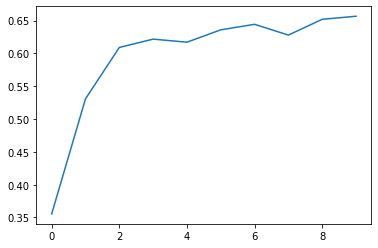

In [17]:
plt.plot(hist_accu)

In [18]:
hist_loss=hist.history["loss"]

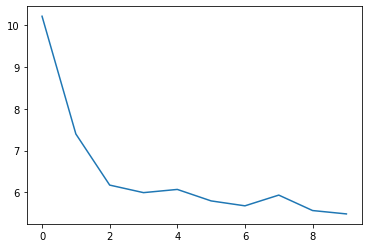

In [19]:
plt.plot(hist_loss)

# For mutiple branch

In [271]:
in_layer=Input(shape=[784])# This is showing inputs of first layer
layer_1=Dense(80,activation="tanh")(in_layer)
layer_2=Dense(80,activation="tanh")(layer_1)  #This shows it is connected to layer 1 and this is called functinal api that means layer 1 is function of layer 1 in this

layer_2_1=Dense(32,activation="tanh")(layer_2)
layer_2_2=Dense(32,activation="tanh")(layer_2)

layer_3_1=Dense(2,activation="softmax")(layer_2_1)

layer_3_2=Dense(10,activation="softmax")(layer_2_2)


In [272]:
model=Model(inputs=[in_layer],outputs=[layer_3_1,layer_3_2])

In [273]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_103 (Dense)               (None, 80)           62800       input_19[0][0]                   
__________________________________________________________________________________________________
dense_104 (Dense)               (None, 80)           6480        dense_103[0][0]                  
__________________________________________________________________________________________________
dense_105 (Dense)               (None, 32)           2592        dense_104[0][0]                  
__________________________________________________________________________________________________
dense_106 

In [274]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [275]:
hist=model.fit(X,[y_sec,y_hot],epochs=20,batch_size=200)

Epoch 1/20
8000/8000 [==============================] - 2s 273us/step - loss: 2.1545 - dense_107_loss: 0.5203 - dense_108_loss: 1.6343 - dense_107_acc: 0.7330 - dense_108_acc: 0.4844
Epoch 2/20
8000/8000 [==============================] - 0s 57us/step - loss: 1.2745 - dense_107_loss: 0.3576 - dense_108_loss: 0.9169 - dense_107_acc: 0.8475 - dense_108_acc: 0.7525
Epoch 3/20
8000/8000 [==============================] - 0s 54us/step - loss: 0.9575 - dense_107_loss: 0.2866 - dense_108_loss: 0.6709 - dense_107_acc: 0.8850 - dense_108_acc: 0.8131
Epoch 4/20
8000/8000 [==============================] - 0s 57us/step - loss: 0.8274 - dense_107_loss: 0.2569 - dense_108_loss: 0.5705 - dense_107_acc: 0.9000 - dense_108_acc: 0.8369
Epoch 5/20
8000/8000 [==============================] - 0s 54us/step - loss: 0.7330 - dense_107_loss: 0.2284 - dense_108_loss: 0.5047 - dense_107_acc: 0.9136 - dense_108_acc: 0.8540
Epoch 6/20
8000/8000 [==============================] - 0s 56us/step - loss: 0.6641 - den

In [276]:
# hist.history

In [277]:
# model.predict(X_test[:10])

In [278]:
np.argmax(model.predict(X[:10])[0],axis=1)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
np.argmax(model.predict(X[:10])[1],axis=1) #Second branch is used to just train the model for different different things

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)

In [282]:
y[:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)